### Predicting Coronavirus Outbreak and Recovering Rate with FB Prophet
+ Lots of influencing factors hence prediction can be wrong
  - Less Data
  - Presence of Effective Treatment and Vaccine can influence prediction

#### Installation
+ pip install fbprophet

#### Data Source
+ https://github.com/CSSEGISandData/COVID-19
+ https://raw.githubusercontent.com/Jcharis/DataScienceTools/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/coronavirus_data_clean.csv

In [0]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
recovered_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
death_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

In [0]:
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
	new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
	return new_df

In [0]:
# Load EDA pkg
import pandas as pd

In [0]:
confirm_df = get_n_melt_data(confirmed_cases_url,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url,"Recovered")
deaths_df = get_n_melt_data(death_cases_url,"Deaths")

In [0]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
20195,"Socorro, NM",US,33.8837,-106.7235,3/11/20,2
20196,"Bernalillo, NM",US,35.0178,-106.6291,3/11/20,1
20197,"Oakland, MI",US,42.5922,-83.3362,3/11/20,1
20198,"Wayne, MI",US,42.2791,-83.3362,3/11/20,1
20199,"New Castle, DE",US,39.5393,-75.6674,3/11/20,1


In [0]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [0]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [0]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
20195,"Socorro, NM",US,33.8837,-106.7235,3/11/20,2,0,0
20196,"Bernalillo, NM",US,35.0178,-106.6291,3/11/20,1,0,0
20197,"Oakland, MI",US,42.5922,-83.3362,3/11/20,1,0,0
20198,"Wayne, MI",US,42.2791,-83.3362,3/11/20,1,0,0
20199,"New Castle, DE",US,39.5393,-75.6674,3/11/20,1,0,0


In [0]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [0]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [0]:
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [0]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,50.000000,50.000000,50.00000
mean,57042.760000,19839.720000,1747.50000
std,37889.240465,22120.723404,1360.22236
min,555.000000,28.000000,17.00000
25%,20883.750000,680.250000,442.50000
50%,70127.000000,10130.000000,1718.00000
75%,83778.500000,35852.500000,2857.50000
max,126968.000000,67014.000000,4647.00000


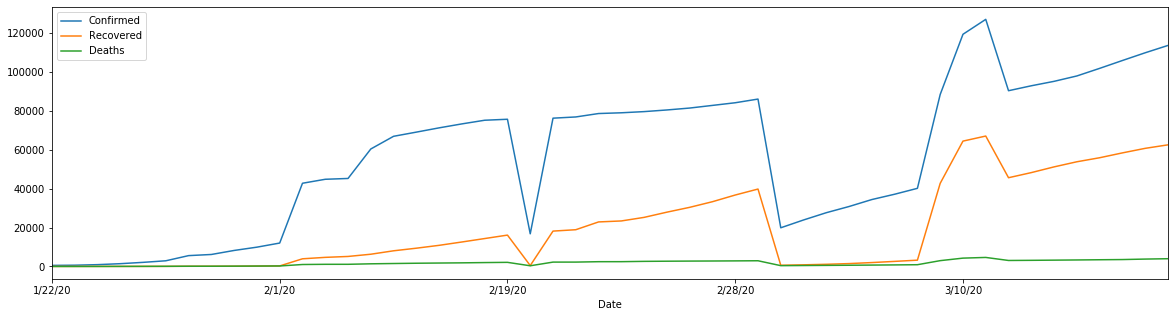

In [0]:
df_per_day.plot(kind='line',figsize=(20,5))

In [0]:
# Time Series Forecasting
import fbprophet


In [0]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [0]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [0]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [0]:
# Split Dataset
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [0]:
global_cases = df_per_day.reset_index()

In [0]:
global_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,555,28,17
1,1/23/20,653,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


In [0]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [0]:
confirmed_cases.shape

(50, 2)

In [0]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
train = confirmed_cases[:40]
test = confirmed_cases[40:]

In [0]:
train.head()

,ds,y
0,1/22/20,555
1,1/23/20,653
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [0]:
# Fit Model
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Future Date
future_dates = m.make_future_dataframe(periods=15)

In [0]:
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [0]:
# Prediction
prediction =  m.predict(future_dates)

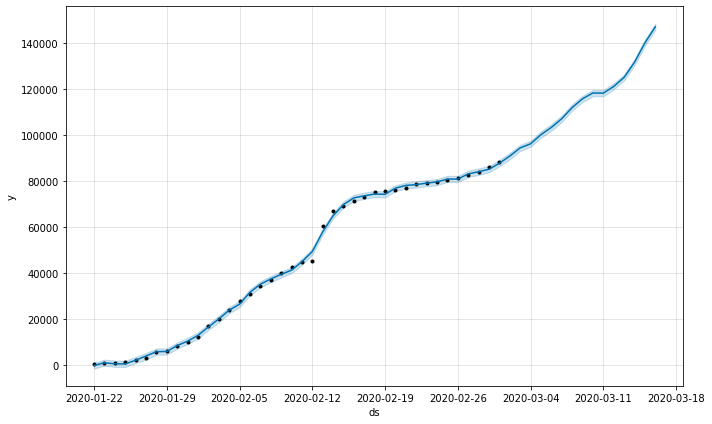

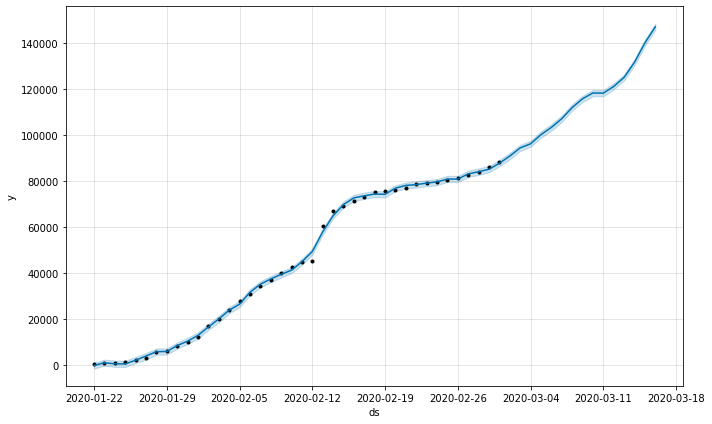

In [0]:
# Plot Prediction
m.plot(prediction)

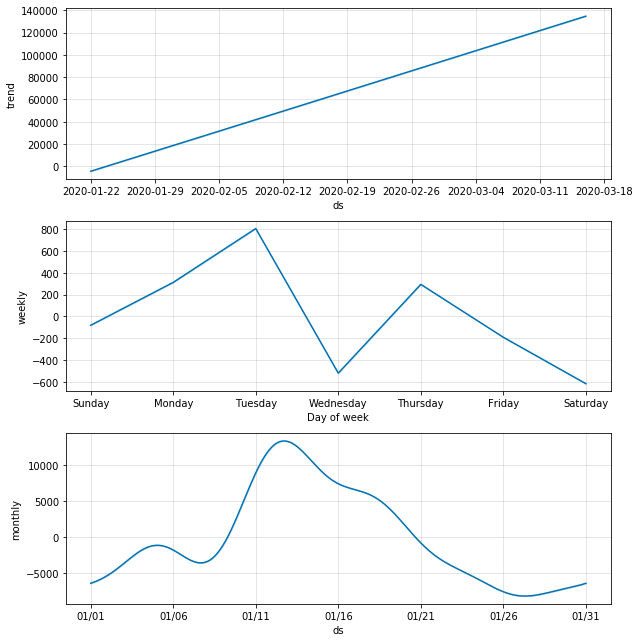

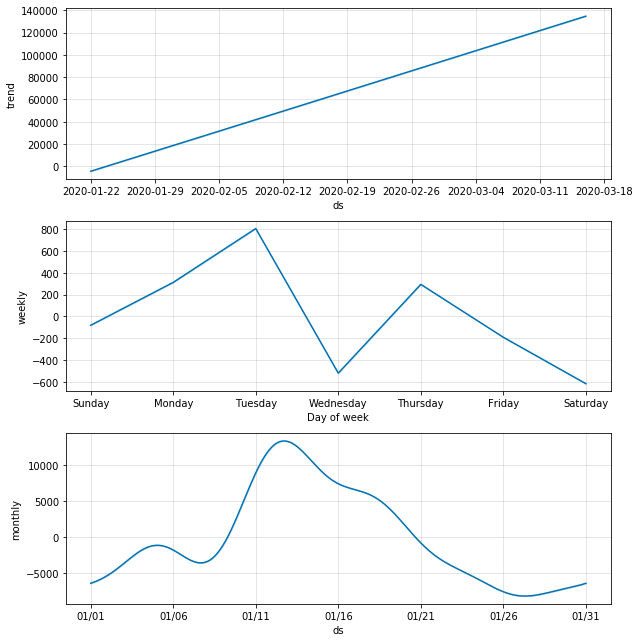

In [0]:
m.plot_components(prediction)

In [0]:
test

,ds,y
40,3/10/20,119298
41,3/11/20,126968
42,3/2/20,90306
43,3/3/20,92840
44,3/4/20,95120
45,3/5/20,97882
46,3/6/20,101784
47,3/7/20,105821
48,3/8/20,109795
49,3/9/20,113561


In [0]:
test['dates'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
test

,ds,y,dates
40,3/10/20,119298,2020-03-10
41,3/11/20,126968,2020-03-11
42,3/2/20,90306,2020-03-02
43,3/3/20,92840,2020-03-03
44,3/4/20,95120,2020-03-04
45,3/5/20,97882,2020-03-05
46,3/6/20,101784,2020-03-06
47,3/7/20,105821,2020-03-07
48,3/8/20,109795,2020-03-08
49,3/9/20,113561,2020-03-09


In [0]:
test = test.set_index("dates")

In [0]:
test = test['y']

In [0]:
import matplotlib.pyplot as plt


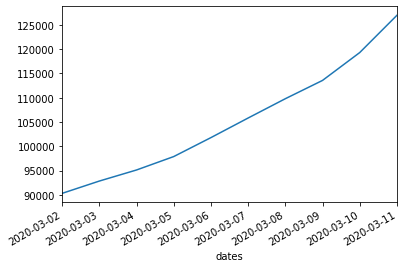

In [0]:
test.plot()

In [0]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

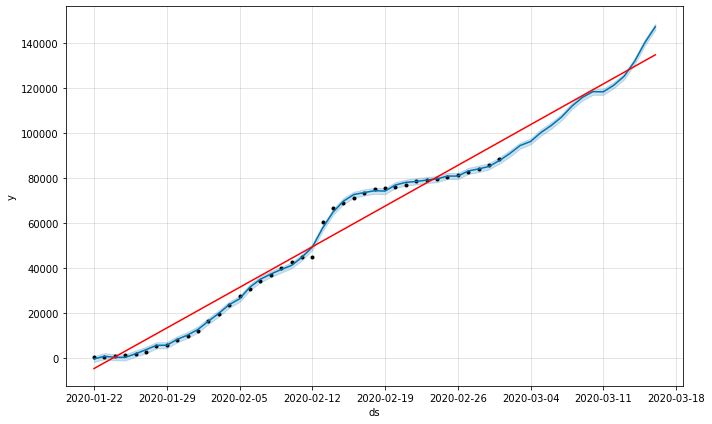

In [0]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)